In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import random

In [37]:
with open('diabetes.csv', 'w', newline = '') as csvfile:
  fieldnames = (['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
  writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
  writer.writeheader()
  for i in range(768):
    writer.writerow({'Pregnancies': random.randint(1,17), 'Glucose':random.randint(0,199), 'BloodPressure':random.randint(0,122), 'SkinThickness':random.randint(0,99),
                     'Insulin': random.randint(0, 846), 'BMI': random.uniform(0.0, 67.1), 'DiabetesPedigreeFunction': random.uniform(0.078, 2.42),
                     'Age': random.randint(21,81), 'Outcome':random.randint(0,1)})

In [38]:
diabetes_file = pd.read_csv("diabetes.csv")
diabetes_file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,13,23,36,26,692,6.520614,0.131162,34,1
1,1,45,86,22,369,64.045488,0.663944,59,0
2,14,146,105,52,183,7.302092,1.161753,23,1
3,17,47,113,87,68,47.970570,1.851523,42,0
4,3,153,102,70,411,26.924315,2.278223,79,0


In [39]:
diabetes_file.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI        DiabetesPedigreeFunction  Age  Outcome
17           139      111            23             711      15.969902  1.170550                  68   1          1
             138      88             53             38       7.289148   1.358134                  43   0          1
             131      98             69             794      14.473540  1.779155                  35   1          1
             121      82             63             304      15.584618  0.942543                  62   0          1
             113      83             61             82       26.304210  2.114386                  51   1          1
                                                                                                                 ..
1            25       44             21             575      39.903361  2.229821                  37   1          1
             24       59             52             409      60.731278  0.302

In [40]:
x = diabetes_file.drop(columns = 'Outcome')
y = diabetes_file['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0             13       23             36             26      692   6.520614   
1              1       45             86             22      369  64.045488   
2             14      146            105             52      183   7.302092   
3             17       47            113             87       68  47.970570   
4              3      153            102             70      411  26.924315   
..           ...      ...            ...            ...      ...        ...   
763            2       67             54             39      726  17.122332   
764            1      175             98              6      443  37.341980   
765            6      164             36             76      229   1.161574   
766           16      166             44             92      801  27.360063   
767            9        8              2             35      150  45.640747   

     DiabetesPedigreeFunction  Age  
0             

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(x.shape, x_train.shape, y_train.shape)

(768, 8) (614, 8) (614,)


In [42]:
model = LogisticRegression(max_iter =200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [43]:
y_pred = model.predict(x_test)
accuracy = accuracy_score (y_test, y_pred)
print(accuracy)

0.5194805194805194


In [44]:
input_data = (1,85,66,29,0,26.6,0.351,31)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
conf_mat = confusion_matrix (y_test, y_pred)
print(conf_mat)

[[54 24]
 [50 26]]


In [46]:
clas_rep = classification_report(y_test, y_pred)
print(clas_rep)

              precision    recall  f1-score   support

           0       0.52      0.69      0.59        78
           1       0.52      0.34      0.41        76

    accuracy                           0.52       154
   macro avg       0.52      0.52      0.50       154
weighted avg       0.52      0.52      0.50       154



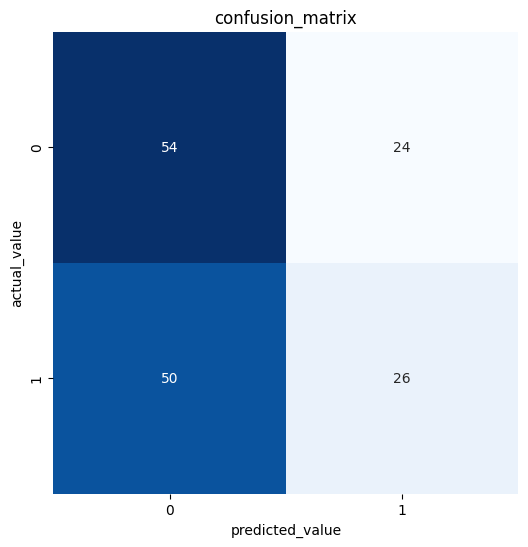

In [47]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Blues", cbar = False)
plt.title("confusion_matrix")
plt.xlabel("predicted_value")
plt.ylabel("actual_value")
plt.show()